In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#aca podemos ver el contenido que hay adentro de un file h5py

import h5py
snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_040.h5py', 'r')
def printname(name):
    print name
snap.visit(printname)

subhalo_000
subhalo_000/Center
subhalo_000/Drk
subhalo_000/Drk/Coordinates
subhalo_000/Drk/Ids
subhalo_000/Drk/Masses
subhalo_000/Drk/Velocities
subhalo_000/Gas
subhalo_000/Gas/Coordinates
subhalo_000/Gas/Density
subhalo_000/Gas/Ids
subhalo_000/Gas/InternalEnergy
subhalo_000/Gas/Masses
subhalo_000/Gas/Velocities
subhalo_000/R200
subhalo_000/Str
subhalo_000/Str/Coordinates
subhalo_000/Str/FormationTime
subhalo_000/Str/Ids
subhalo_000/Str/Masses
subhalo_000/Str/Metallicity
subhalo_000/Str/Velocities
subhalo_000/Time
subhalo_001
subhalo_001/Center
subhalo_001/Drk
subhalo_001/Drk/Coordinates
subhalo_001/Drk/Ids
subhalo_001/Drk/Masses
subhalo_001/Drk/Velocities
subhalo_001/Gas
subhalo_001/Gas/Coordinates
subhalo_001/Gas/Density
subhalo_001/Gas/Ids
subhalo_001/Gas/InternalEnergy
subhalo_001/Gas/Masses
subhalo_001/Gas/Velocities
subhalo_001/R200
subhalo_001/Str
subhalo_001/Str/Coordinates
subhalo_001/Str/FormationTime
subhalo_001/Str/Ids
subhalo_001/Str/Masses
subhalo_001/Str/Metallicity
subh

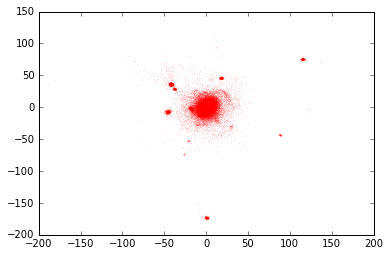

In [3]:
#con esto podemos graficar el contenido que hay en el file

import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

#esto nos da el tamaño de la figura
#fig = figure(figsize(6,6))

#le damos un nombre al archivo que estoy leyendo
snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_375.h5py', 'r')

#leo el contenido dentro del archivo
pstr = snap['/subhalo_003/Str/Coordinates'].value
cm   = snap['/subhalo_003/Center'].value
vel  = snap['/subhalo_003/Str/Velocities'].value
masa = snap['/subhalo_003/Str/Masses'].value

#aca paso las coordenadas respecto al centro de la galaxia
xstr=pstr[:,0]-cm[0]
ystr=pstr[:,1]-cm[1]
zstr=pstr[:,2]-cm[2]
r=np.sqrt(xstr**2+ystr**2+zstr**2)

#esto sirve si quiero hacer una submuestra de mi conjunto de datos
corte,=np.where(r<30)
veloc,=np.where(r<5)


#escribo las componentes de la velocidad del centro de masa
vxcm = sum(masa[veloc]*vel[veloc,0])/sum(masa[veloc])
vycm = sum(masa[veloc]*vel[veloc,1])/sum(masa[veloc])
vzcm = sum(masa[veloc]*vel[veloc,2])/sum(masa[veloc])

#saco las velocidades de las estrellas respecto del centro de masa de la galaxia
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

#utilizo una matriz de rotacion de modo que el plano xy coincida aprox con el plano del disco
# rot.rot, el primer rot es como yo le llamo arriba cuando importo, el segundo rot tiene que ver
#con como se llama la funcion adentro del archivo rotation
#xn,yn,zn,vxn,vyn,vzn = rot.rot(masa[corte],xstr[corte],ystr[corte],zstr[corte],vx[corte],vy[corte],vz[corte],20)

plt.plot(xstr, ystr, 'k.', markersize=0.1, color='red')
plt.savefig('hola.png', dpi = 300)
plt.savefig('hola0.png')


In [12]:
import matplotlib.pyplot as plt
import h5py

snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_497.h5py', 'r')
pdrk   = snap['/subhalo_000/Drk/Coordinates'].value

cm   = snap['/subhalo_000/Center'].value

plt.plot(pdrk[:,0]-cm[0], pdrk[:,1]-cm[1], 'k.', markersize=0.01, color='red')
plt.draw()
#savefig('imagen2.png', dpi=300)


#plt.clf() # borra imagen

NameError: name 'savefig' is not defined

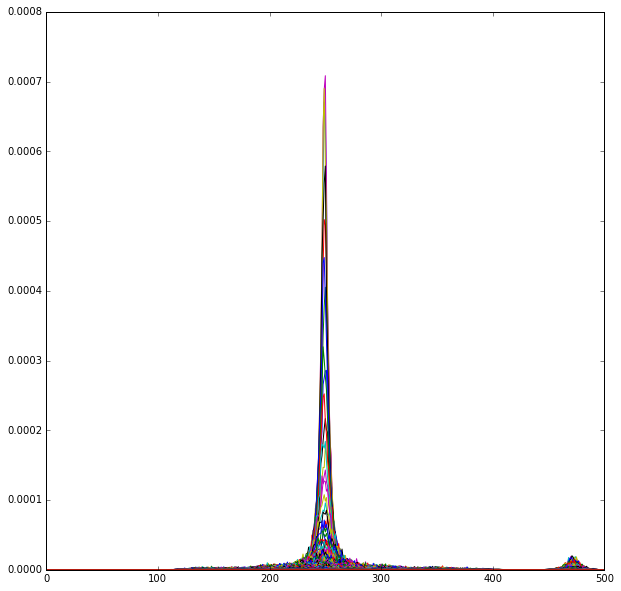

In [19]:
#con esto podemos graficar el contenido que hay en el file

import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

#esto nos da el tamaño de la figura
#fig = figure(figsize(6,6))

#le damos un nombre al archivo que estoy leyendo
snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_375.h5py', 'r')

#leo el contenido dentro del archivo
pstr = snap['/subhalo_003/Str/Coordinates'].value
cm   = snap['/subhalo_003/Center'].value
vel  = snap['/subhalo_003/Str/Velocities'].value
masa = snap['/subhalo_003/Str/Masses'].value

#aca paso las coordenadas respecto al centro de la galaxia
xstr=pstr[:,0]-cm[0]
ystr=pstr[:,1]-cm[1]
zstr=pstr[:,2]-cm[2]
r=np.sqrt(xstr**2+ystr**2+zstr**2)

#esto sirve si quiero hacer una submuestra de mi conjunto de datos
corte,=np.where(r<30)
veloc,=np.where(r<5)


#escribo las componentes de la velocidad del centro de masa
vxcm = sum(masa[veloc]*vel[veloc,0])/sum(masa[veloc])
vycm = sum(masa[veloc]*vel[veloc,1])/sum(masa[veloc])
vzcm = sum(masa[veloc]*vel[veloc,2])/sum(masa[veloc])

#saco las velocidades de las estrellas respecto del centro de masa de la galaxia
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

#utilizo una matriz de rotacion de modo que el plano xy coincida aprox con el plano del disco
# rot.rot, el primer rot es como yo le llamo arriba cuando importo, el segundo rot tiene que ver
#con como se llama la funcion adentro del archivo rotation
xn,yn,zn,vxn,vyn,vzn = rot.rot(masa,xstr,ystr,zstr,vx,vy,vz)



import sphviewer as sph


##posiciones de partículas que se quiere graficar

pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xn
pos[1,:]=yn
pos[2,:]=zn

#generador del gráfico
particles=sph.Particles(pos,masa,nb=5)

#escena del gráfico---------
escena=sph.Scene(particles)

#como queres la escena-----------
escena.set_autocamera(mode='density')
rl=20
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])

#renderizado de la escena (aca hace la grid y cuenta particulas)
rend=sph.Render(escena)

##extencion del grafico
extent=escena.get_extent()

#escala logaritmica-----------------
rend.set_logscale()

#rango que tiene la escala  de colores-----
vmin=4
vmax=9

# escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)
cmap='jet'

#grafico-----------
fig=plt.figure(5,figsize=(10,10))
ax=fig.add_subplot(111)
ax.plot(rend.get_image(),extent=extent,vmin=vmin,vmax=vmax,origin='lower',cmap='jet')

#etc (como queres el grafico depende de vos)

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


im1 = ax1.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im1, ax=ax1)
ax1.set_title('pcolormesh with levels22')

# contours are *point* based plots, so convert our bound into point
# centers
#cf = ax1.contourf(x[:-1, :-1] + dx/2.,
 #                 y[:-1, :-1] + dy/2., z, levels=levels,
#                cmap=cmap)
#fig.colorbar(cf, ax=ax1)
#ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

In [7]:
?plt.figure